In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

In [80]:
house_price_data = fetch_openml(name='house_prices', as_frame=True)

In [81]:
dir(house_price_data)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [82]:
house_price_dataset = pd.DataFrame(house_price_data.data, columns=house_price_data.feature_names)

In [83]:
house_price_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [84]:
# Add the target col to the house price dataset
house_price_dataset['price'] = house_price_data.target

In [85]:
house_price_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [86]:
house_price_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [87]:
# Check for missing values
house_price_dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
price              0
Length: 81, dtype: int64

In [88]:
# Trim the dataset
house_price_dataset_trim = house_price_dataset[[
    'Street', 'Neighborhood', 'HouseStyle', 'YearBuilt', 'RoofStyle', 'GarageType', 'PoolArea', 'Fence', 'SaleCondition', 'price']]

In [89]:
house_price_dataset_trim.head()

,Street,Neighborhood,HouseStyle,YearBuilt,RoofStyle,GarageType,PoolArea,Fence,SaleCondition,price
0,Pave,CollgCr,2Story,2003,Gable,Attchd,0,NaN,Normal,208500
1,Pave,Veenker,1Story,1976,Gable,Attchd,0,NaN,Normal,181500
2,Pave,CollgCr,2Story,2001,Gable,Attchd,0,NaN,Normal,223500
3,Pave,Crawfor,2Story,1915,Gable,Detchd,0,NaN,Abnorml,140000
4,Pave,NoRidge,2Story,2000,Gable,Attchd,0,NaN,Normal,250000


In [90]:
house_price_dataset_trim['Age'] = house_price_dataset_trim['YearBuilt'].apply(lambda x: 2024-x)

/tmp/ipykernel_5776/847179037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_dataset_trim['Age'] = house_price_dataset_trim['YearBuilt'].apply(lambda x: 2024-x)


In [91]:
house_price_dataset_trim

,Street,Neighborhood,HouseStyle,YearBuilt,RoofStyle,GarageType,PoolArea,Fence,SaleCondition,price,Age
0,Pave,CollgCr,2Story,2003,Gable,Attchd,0,NaN,Normal,208500,21
1,Pave,Veenker,1Story,1976,Gable,Attchd,0,NaN,Normal,181500,48
2,Pave,CollgCr,2Story,2001,Gable,Attchd,0,NaN,Normal,223500,23
3,Pave,Crawfor,2Story,1915,Gable,Detchd,0,NaN,Abnorml,140000,109
4,Pave,NoRidge,2Story,2000,Gable,Attchd,0,NaN,Normal,250000,24
...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Gilbert,2Story,1999,Gable,Attchd,0,NaN,Normal,175000,25
1456,Pave,NWAmes,1Story,1978,Gable,Attchd,0,MnPrv,Normal,210000,46
1457,Pave,Crawfor,2Story,1941,Gable,Attchd,0,GdPrv,Normal,266500,83
1458,Pave,NAmes,1Story,1950,Hip,Attchd,0,NaN,Normal,142125,74


In [92]:
house_price_dataset_trim.isnull().sum()

Street              0
Neighborhood        0
HouseStyle          0
YearBuilt           0
RoofStyle           0
GarageType         81
PoolArea            0
Fence            1179
SaleCondition       0
price               0
Age                 0
dtype: int64

In [93]:
# Drop cols with too much null
house_price_dataset_trim.drop('Fence', axis=1, inplace=True)

/tmp/ipykernel_5776/686065204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_dataset_trim.drop('Fence', axis=1, inplace=True)


In [94]:
house_price_dataset_trim

,Street,Neighborhood,HouseStyle,YearBuilt,RoofStyle,GarageType,PoolArea,SaleCondition,price,Age
0,Pave,CollgCr,2Story,2003,Gable,Attchd,0,Normal,208500,21
1,Pave,Veenker,1Story,1976,Gable,Attchd,0,Normal,181500,48
2,Pave,CollgCr,2Story,2001,Gable,Attchd,0,Normal,223500,23
3,Pave,Crawfor,2Story,1915,Gable,Detchd,0,Abnorml,140000,109
4,Pave,NoRidge,2Story,2000,Gable,Attchd,0,Normal,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Gilbert,2Story,1999,Gable,Attchd,0,Normal,175000,25
1456,Pave,NWAmes,1Story,1978,Gable,Attchd,0,Normal,210000,46
1457,Pave,Crawfor,2Story,1941,Gable,Attchd,0,Normal,266500,83
1458,Pave,NAmes,1Story,1950,Hip,Attchd,0,Normal,142125,74


In [95]:
house_price_dataset_trim.PoolArea.value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [107]:
# Drop Street, Year, RoofStyle, GarageType
house_price_dataset_trim = house_price_dataset_trim.drop(['Street', 'HouseStyle', 'RoofStyle', 'GarageType', 'YearBuilt', 'PoolArea'], axis=1)

In [108]:
le = LabelEncoder()

In [109]:
dfle = house_price_dataset_trim

In [110]:
dfle.Neighborhood = le.fit_transform(dfle.Neighborhood)

In [111]:
dfle.head()

,Neighborhood,SaleCondition,price,Age
0,5,Normal,208500,21
1,24,Normal,181500,48
2,5,Normal,223500,23
3,6,Abnorml,140000,109
4,15,Normal,250000,24


In [112]:
dfle.SaleCondition = le.fit_transform(dfle.SaleCondition)

In [113]:
dfle.head()

,Neighborhood,SaleCondition,price,Age
0,5,4,208500,21
1,24,4,181500,48
2,5,4,223500,23
3,6,0,140000,109
4,15,4,250000,24


In [207]:
scaler = MinMaxScaler()
scaler.fit(dfle[['price']])
dfle.price = scaler.transform(dfle[['price']])

In [208]:
dfle

,Neighborhood,SaleCondition,price,Age
0,5,4,0.241078,21
1,24,4,0.203583,48
2,5,4,0.261908,23
3,6,0,0.145952,109
4,15,4,0.298709,24
...,...,...,...,...
1455,8,4,0.194556,25
1456,14,4,0.243161,46
1457,6,4,0.321622,83
1458,12,4,0.148903,74


In [209]:
X = dfle[["Neighborhood", 'SaleCondition', 'Age']].values

In [211]:
X = scaler.fit_transform(X)

In [212]:
X

array([[0.20833333, 0.8       , 0.05072464],
       [1.        , 0.8       , 0.24637681],
       [0.20833333, 0.8       , 0.06521739],
       ...,
       [0.25      , 0.8       , 0.5       ],
       [0.5       , 0.8       , 0.43478261],
       [0.29166667, 0.8       , 0.32608696]])

In [227]:
y = dfle.price.values

In [229]:
(y)

array([0.24107763, 0.20358284, 0.26190807, ..., 0.321622  , 0.14890293,
       0.15636717])

In [230]:
X

array([[0.20833333, 0.8       , 0.05072464],
       [1.        , 0.8       , 0.24637681],
       [0.20833333, 0.8       , 0.06521739],
       ...,
       [0.25      , 0.8       , 0.5       ],
       [0.5       , 0.8       , 0.43478261],
       [0.29166667, 0.8       , 0.32608696]])

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [232]:
y_train

array([0.15289543, 0.1987224 , 0.06957367, ..., 0.11123455, 0.21531732,
       0.19316762])

In [233]:
# USing XGBoost Regressor
model = XGBRegressor()

In [234]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [235]:
training_data_prediction = model.predict(X_train)

In [236]:
training_data_prediction

array([0.15819404, 0.1989628 , 0.08742818, ..., 0.11985492, 0.2504068 ,
       0.185053  ], dtype=float32)

In [237]:
# Use R squared error to find the variance for regression
score_r2 = metrics.r2_score(y_train, training_data_prediction)

In [238]:
# Use mean absolute error
score_mae = metrics.mean_absolute_error(y_train, training_data_prediction)

In [239]:
print('score r squared error: ', score_r2, 'mean absolute error: ', score_mae)

score r squared error:  0.8184876148915343 mean absolute error:  0.029068323291668034


In [240]:
test_data_prediction = model.predict(X_test)

In [241]:
score_r2 = metrics.r2_score(y_test, test_data_prediction)

In [242]:
score_r2

0.5365328517661023

In [243]:
score_mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [244]:
score_mae

0.05127280125886228

In [245]:
"""Visualizing the acutal vs predicted prices"""

'Visualizing the acutal vs predicted prices'

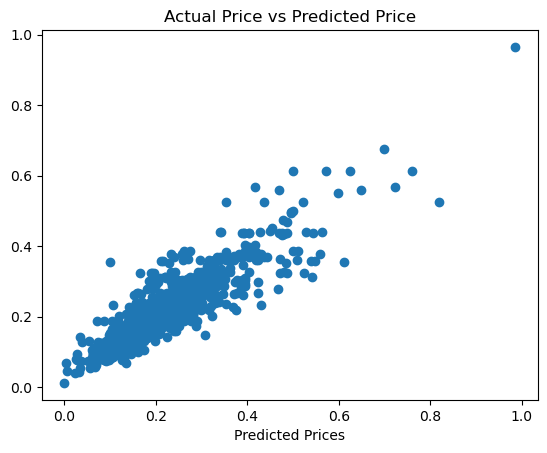

In [247]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price');
